In [63]:
#question 1
import pandas as pd
import numpy as np
link = "resources/winequality-white.csv"
df = pd.read_csv(link, header="infer", delimiter=",")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())
print('number of samples', df.shape[0])
print('number of variables', df.shape[1])


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= A few first samples ========= 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34     

In [33]:
#question 2
X = df.drop("quality", axis=1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())


========= Wine Qualities ========= 

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


In [34]:
#question 3
# bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
Y.loc[np.where(Y <= 5)]=0
Y.loc[np.where(Y > 5)]=1
Y.name = "Label"

c:\users\tider\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


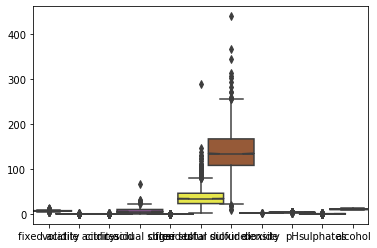

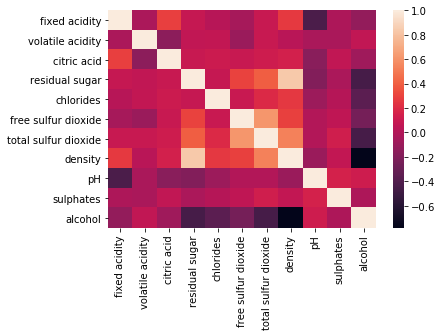

In [35]:
#question 4
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)

In [40]:
#2.1
from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)
Xt, Xv, Yt, Yv = train_test_split(Xt, Yt, shuffle=True, test_size=0.5, stratify=Yt)
print('learning set', Xa.shape[0])
print('test set', Xt.shape[0])
print('validation set', Xv.shape[0])

learning set 3265
test set 816
validation set 817


In [41]:
#2.2.1
from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 2
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)
# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1-accuracy_score(Yv, Ypred_v)
print('error', error_v)

error 0.35006119951040393


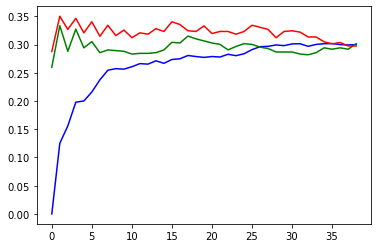

In [58]:
#2.2.2
k_values = np.arange(1,40)
clfs = [KNeighborsClassifier(n_neighbors = k) for k in k_values]
for clf in clfs:
    clf.fit(Xa, Ya)
train_error_values = np.array([ 1 - accuracy_score(Ya, clf.predict(Xa)) for clf in clfs])
test_error_values = np.array([ 1 - accuracy_score(Yt, clf.predict(Xt)) for clf in clfs])
validation_error_values = np.array([ 1 - accuracy_score(Yv, clf.predict(Xv)) for clf in clfs])

print('learning curves')
plt.plot(train_error_values, 'b')
plt.plot(test_error_values, 'g')
plt.plot(validation_error_values, 'r')
# when k is small overfitting
# when k is big underfitting

In [62]:
minIndex = np.argmin(test_error_values)
print('k* is', k_values[minIndex])
print('test error for k* is', test_error_values[minIndex])
print('validation error for k* is', validation_error_values[minIndex])

k* is 1
test error for k* is 0.2598039215686274
validation error for k* is 0.28763769889840884


In [64]:
#2.3.1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)
Xt_n = sc.transform(Xt)

learning curves
k* is 1
test error for k* is 0.1924019607843137
validation error for k* is 0.21787025703794372


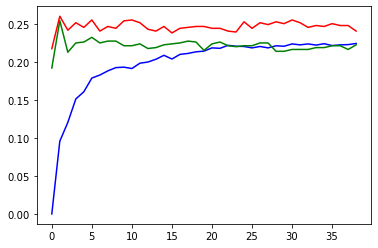

In [67]:
#2.3.2
k_values = np.arange(1,40)
clfs = [KNeighborsClassifier(n_neighbors = k) for k in k_values]
for clf in clfs:
    clf.fit(Xa_n, Ya)
train_error_values = np.array([ 1 - accuracy_score(Ya, clf.predict(Xa_n)) for clf in clfs])
test_error_values = np.array([ 1 - accuracy_score(Yt, clf.predict(Xt_n)) for clf in clfs])
validation_error_values = np.array([ 1 - accuracy_score(Yv, clf.predict(Xv_n)) for clf in clfs])

print('learning curves')
plt.plot(train_error_values, 'b')
plt.plot(test_error_values, 'g')
plt.plot(validation_error_values, 'r')

minIndex = np.argmin(test_error_values)
print('k* is', k_values[minIndex])
print('test error for k* is', test_error_values[minIndex])
print('validation error for k* is', validation_error_values[minIndex])
#ramark error rate will be much lower

In [ ]:
"""
for question 3 see this
https://dzone.com/articles/machine-learning-validation-techniques
the idea is to use other validation techniques rather than splitting into train and test
see espically K Fold cross validation
"""